# Capital Asset Pricing Model (Expanded)

The Capital Asset Pricing Model (CAPM) is a cornerstone of modern financial theory, providing a framework for understanding the trade-off between risk and return for individual assets in a diversified portfolio. Developed by William Sharpe in the 1960s, CAPM posits that the expected return of an asset is directly related to its systematic risk, as measured by beta (𝛽). Beta represents the sensitivity of an asset's returns to the returns of the overall market, capturing the asset's exposure to market-wide risk factors.

**Expected Return= R𝑓 + 𝛽 × (Rm− Rf)**

Where:

- R𝑓 is the risk-free rate.
- 𝛽 (beta) is the measure of the asset's volatility relative to the market.
- 𝑅𝑚 is the expected market return.
- (𝑅𝑚 − 𝑅𝑓) is the market risk premium.



Traditional Assets

**Apple Inc. (AAPL)**: Apple is a leading technology company known for its consumer electronics products such as the iPhone, iPad, Mac computers, and services like the App Store and iCloud.

**Microsoft Corporation (MSFT)**: Microsoft is a multinational technology company that develops, manufactures, licenses, supports, and sells software, electronics, personal computers, and related services. Its flagship products include the Windows operating system, Microsoft Office suite, and Azure cloud services.

**Amazon.com, Inc. (AMZN)**: Amazon is a global e-commerce and cloud computing company. It is the largest online retailer in the world and also provides cloud infrastructure services through Amazon Web Services (AWS).

**Alphabet Inc. (GOOGL)**: Alphabet is the parent company of Google and several former Google subsidiaries. Google is the world’s leading search engine and also offers various online advertising services, software, and hardware products.

**Tesla, Inc. (TSLA)**: Tesla is an electric vehicle and clean energy company. It designs and manufactures electric cars, battery energy storage systems, and solar products. Tesla is known for its innovation in the automotive industry.

**SPDR S&P 500 ETF Trust (SPY)**: This ETF seeks to provide investment results that, before expenses, correspond generally to the price and yield performance of the S&P 500 Index, which measures the performance of 500 large-cap U.S. stocks.

**iShares Core U.S. Aggregate Bond ETF (AGG)**: AGG aims to track the investment results of an index composed of the total U.S. investment-grade bond market, including government, corporate, and mortgage-backed securities.

**Invesco Global Listed Private Equity Portfolio (PSP)**: PSP provides exposure to publicly traded private equity companies, offering insight into the performance of private equity investments through publicly listed firms.

**Vanguard Real Estate ETF (VNQ)**: VNQ seeks to track the performance of the MSCI US Investable Market Real Estate 25/50 Index, which measures the performance of real estate investment trusts (REITs) and other real estate-related investments.

**SPDR Gold Shares ETF (GLD)**: GLD seeks to reflect the performance of the price of gold bullion, less the Trust’s expenses. It is often used as a hedge against inflation and currency risk.

**United States Oil Fund (USO)**: USO aims to track the daily price movements of West Texas Intermediate (WTI) light, sweet crude oil. It provides exposure to oil prices and is used to gain exposure to the energy market.

**Dow Jones Industrial Average (DJI)**: The DJIA is a stock market index that measures the stock performance of 30 large, publicly-owned companies listed on stock exchanges in the United States. It is one of the oldest and most well-known indices in the world.

Cryptocurrencies

**Bitcoin (BTC-USD)**: Bitcoin is the first and most widely recognized cryptocurrency, often referred to as digital gold. It is a decentralized digital currency without a central bank or single administrator.

**Ethereum (ETH-USD)**: Ethereum is a decentralized platform that enables smart contracts and decentralized applications (DApps) to be built and run without any downtime, fraud, control, or interference from a third party.

**Solana (SOL-USD)**: Solana is a high-performance blockchain supporting builders around the world creating crypto apps that scale today. It is known for its fast transaction speeds and low fees.

**Binance Coin (BNB-USD)**: Binance Coin is the cryptocurrency of the Binance exchange. Initially created as a utility token for discounted trading fees, its use cases have expanded to various applications on Binance's platform and other ecosystems.

**XRP (XRP-USD)**: XRP is a digital payment protocol and cryptocurrency designed for fast and low-cost international money transfers. It is often associated with its parent company, Ripple.

**Toncoin (TON-USD)**: Toncoin is the native cryptocurrency of The Open Network (TON), a blockchain originally developed by Telegram to provide fast, secure, and scalable digital transactions.

**Dogecoin (DOGE-USD)**: Originally created as a joke, Dogecoin has gained popularity as a cryptocurrency due to its active community and use in microtransactions and charitable events.

**Cardano (ADA-USD)**: Cardano is a blockchain platform for smart contracts, aiming to provide more advanced features than any protocol previously developed. It focuses on security, scalability, and sustainability.

**Shiba Inu (SHIB-USD)**: Shiba Inu is a decentralized cryptocurrency created as an experiment in community building and decentralized spontaneous growth, often seen as an alternative to Dogecoin.

**Avalanche (AVAX-USD)**: Avalanche is a platform for launching decentralized applications and enterprise blockchain deployments in one interoperable, scalable ecosystem. It aims to improve blockchain technology’s speed, scalability, and security.

Index

**Bitwise 10 Crypto Index Fund (BITW)**: BITW aims to track the performance of the Bitwise 10 Large Cap Crypto Index, which is designed to provide exposure to the 10 largest cryptocurrencies, weighted by market capitalization.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# Define the assets
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'AGG', 'PSP', 'VNQ', 'GLD', 'USO', 'DJI']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']
index = 'BITW'

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download data for all assets and the index
data = yf.download(cryptos + assets + [index], start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
market_returns = returns[index]

# Initialize dictionary to store betas
betas = {}

# Calculate beta for each asset
for asset in cryptos + assets:
    # Prepare the data for regression
    X = market_returns
    y = returns[asset]
    
    # Add constant term for intercept
    X = sm.add_constant(X)
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Get the beta (slope of the regression line)
    beta = model.params[1]
    
    # Store the beta value
    betas[asset] = beta

[*********************100%%**********************]  23 of 23 completed
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_66700/616167657.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_66700/616167657.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_66700/616167657.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

# Risk Free Rate Calculation

1. Determine the Risk-Free Rate

The risk-free rate is typically the return on government bonds, such as U.S. Treasury bills. We used the yield on a 10-year U.S. Treasury bond as a proxy for the risk-free rate.

In [16]:
risk_free_rate = 0.03  # Approximate 10-year U.S. Treasury bond yield


# Market Returns

2. Calculate the Expected Market Return

The expected market return can be the average return of broad market for each asset.


In [20]:
market_return_equities = 0.10
market_return_bonds = 0.05
market_return_real_estate = 0.08
market_return_commodities = 0.05
market_return_private_equity = 0.12
market_return_crypto = 0.20  # Example, adjust based on specific analysis or assumptions


# Beta Calculation + Market Risk Premium

3. Calculate the Beta

Beta measures the volatility of a cryptocurrency relative to the market. 

To calculate beta:
1. Collect Historical Price Data: Obtain historical daily prices for each cryptocurrency and the chosen market index.
2. Calculate Returns: Compute the daily returns for each cryptocurrency and the market index.
3. Run a Regression Analysis: Perform a linear regression with the cryptocurrency returns as the dependent variable and the market index returns as the independent variable. The slope of the regression line is the beta.

4. Compute the Market Risk Premium (\(R_m - R_f\))

The market risk premium is the difference between the expected market return and the risk-free rate.


In [18]:
# Initialize dictionaries to store expected returns for each asset class
expected_returns_equities = {}
expected_returns_bonds = {}
expected_returns_real_estate = {}
expected_returns_commodities = {}
expected_returns_private_equity = {}
expected_returns_crypto = {}

# Calculate expected returns using CAPM
for asset, beta in betas.items():
    if asset in ['SPY', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'DJI']:
        expected_return = risk_free_rate + beta * (market_return_equities - risk_free_rate)
        expected_returns_equities[asset] = expected_return
    elif asset in ['AGG']:
        expected_return = risk_free_rate + beta * (market_return_bonds - risk_free_rate)
        expected_returns_bonds[asset] = expected_return
    elif asset in ['VNQ']:
        expected_return = risk_free_rate + beta * (market_return_real_estate - risk_free_rate)
        expected_returns_real_estate[asset] = expected_return
    elif asset in ['GLD', 'USO']:
        expected_return = risk_free_rate + beta * (market_return_commodities - risk_free_rate)
        expected_returns_commodities[asset] = expected_return
    elif asset in ['PSP']:
        expected_return = risk_free_rate + beta * (market_return_private_equity - risk_free_rate)
        expected_returns_private_equity[asset] = expected_return
    elif asset in ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']:
        expected_return = risk_free_rate + beta * (market_return_crypto - risk_free_rate)
        expected_returns_crypto[asset] = expected_return

# Combine all expected returns into a single DataFrame
capm_df = pd.DataFrame({
    'Beta': betas,
    'Expected Return (CAPM)': {**expected_returns_equities, **expected_returns_bonds, **expected_returns_real_estate, **expected_returns_commodities, **expected_returns_private_equity, **expected_returns_crypto}
})

# Display the DataFrame
print(capm_df)


              Beta  Expected Return (CAPM)
BTC-USD   0.468009                0.109561
ETH-USD   0.544777                0.122612
SOL-USD   0.725297                0.153301
BNB-USD   0.394427                0.097053
XRP-USD   0.569858                0.126876
TON-USD   0.415367                0.100612
DOGE-USD  0.499549                0.114923
ADA-USD   0.554140                0.124204
SHIB-USD  0.523131                0.118932
AVAX-USD  0.606193                0.133053
AAPL      0.148944                0.040426
MSFT      0.146872                0.040281
AMZN      0.219366                0.045356
GOOGL     0.165319                0.041572
TSLA      0.273389                0.049137
SPY       0.108364                0.037585
AGG       0.011475                0.030230
PSP       0.159620                0.044366
VNQ       0.088390                0.034420
GLD       0.019459                0.030389
USO       0.040779                0.030816
DJI       0.008925                0.030625


# Visualization

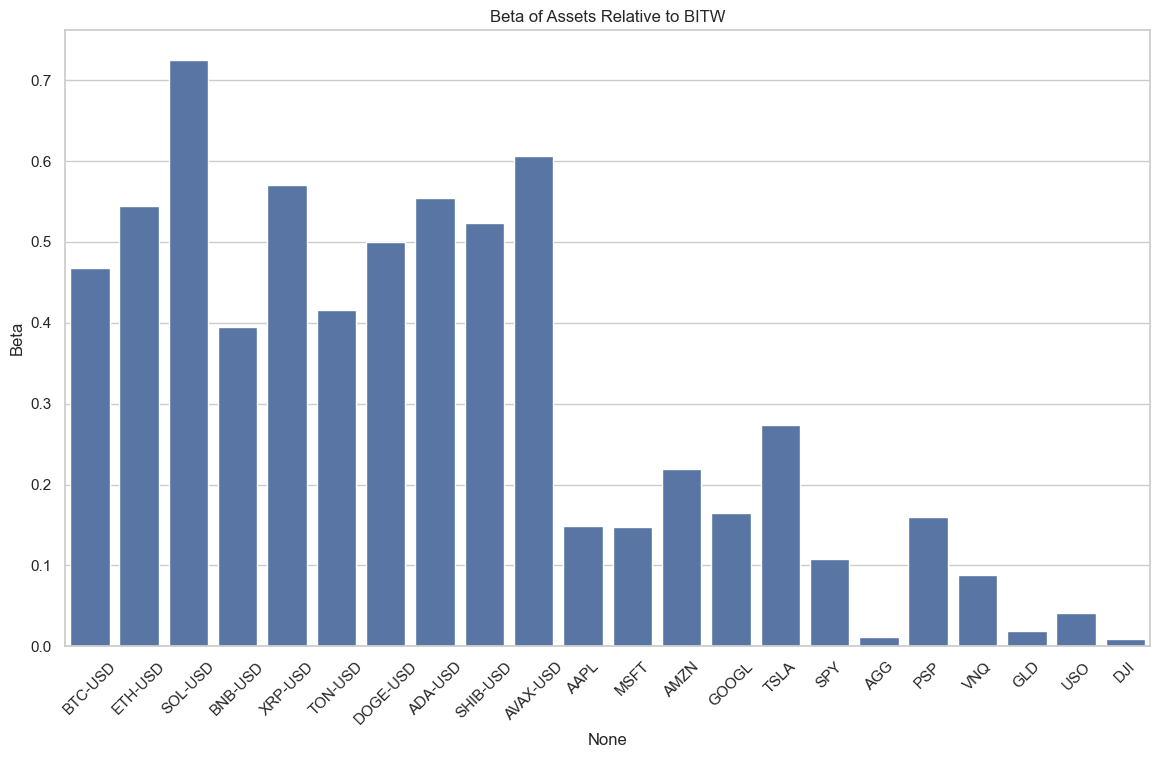

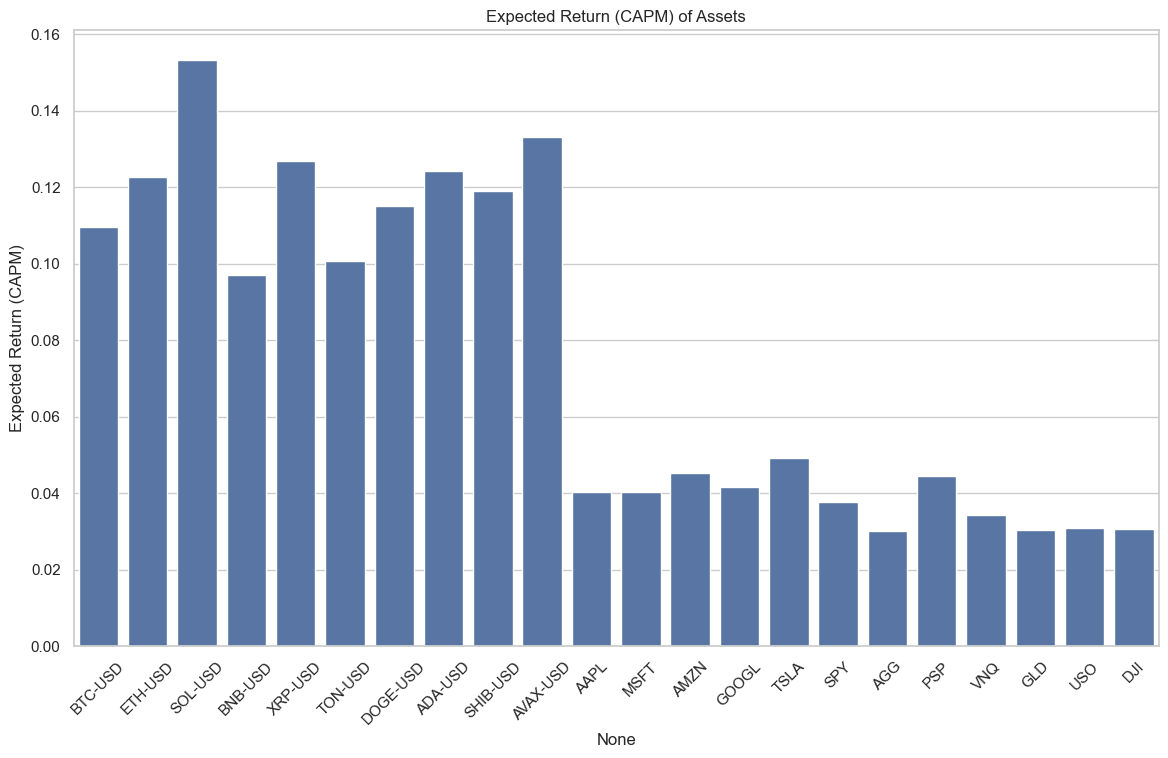

In [19]:
# Setting the style
sns.set(style="whitegrid")

# Plot Beta
plt.figure(figsize=(14, 8))
sns.barplot(x=capm_df.index, y=capm_df['Beta'])
plt.title('Beta of Assets Relative to BITW')
plt.xticks(rotation=45)
plt.ylabel('Beta')
plt.show()

# Plot Expected Return (CAPM)
plt.figure(figsize=(14, 8))
sns.barplot(x=capm_df.index, y=capm_df['Expected Return (CAPM)'])
plt.title('Expected Return (CAPM) of Assets')
plt.xticks(rotation=45)
plt.ylabel('Expected Return (CAPM)')
plt.show()
